In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
sns.set(style="whitegrid")
%matplotlib inline

DATA_FOLDER = 'Dataset/BeerAdvocate/'

BEERS_DATASET = DATA_FOLDER+"beers.csv"
BREWERIES_DATASET = DATA_FOLDER+"breweries.csv"
USERS_DATASET = DATA_FOLDER+"users.csv"

In [69]:
beers = pd.read_csv(BEERS_DATASET)
beers.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [70]:
breweries = pd.read_csv(BREWERIES_DATASET)
breweries.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [71]:
users = pd.read_csv(USERS_DATASET)
users.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


Let us group the breweries by location.


In [72]:
breweries_country = breweries.groupby('location')
breweries_country.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2
...,...,...,...,...
16663,1927,"United States</a> | <a href=""http://maps.googl...",Il Vicino Wood Oven Pizza and Brewery,1
16676,28908,"Utah</a><br><a href=""http://utahbeers.com"" tar...",Utah Brewers Cooperative,128
16693,70,"United States</a> | <a href=""http://maps.googl...",Full Sail Brewing Company,0
16750,5025,Aruba,Cerbeseria Arubano,0


### Number of breweries per country (descending order)

In [73]:
nbr_breweries_by_country = breweries_country.size().sort_values(ascending=False)[:30]
nbr_breweries_by_country

location
Germany                          1431
England                           997
United States, California         929
Canada                            775
United States, Washington         411
United States, New York           406
United States, Colorado           404
France                            402
Australia                         401
Italy                             369
Belgium                           335
United States, Pennsylvania       328
United States, Michigan           321
Spain                             315
United States, Florida            297
United States, Oregon             295
United States, Texas              280
Russia                            268
United States, Illinois           266
Netherlands                       258
United States, North Carolina     249
United States, Virginia           229
United States, Ohio               225
United States, Wisconsin          219
Austria                           212
Brazil                            209
Jap

### Number of different beers produced per country (descending order)

In [74]:
nbr_beers_by_country = breweries_country['nbr_beers'].agg('sum').sort_values(ascending=False)[:30]
nbr_beers_by_country


location
United States, California        35587
United States, Pennsylvania      22710
United States, Colorado          18181
Canada                           16372
United States, Illinois          14993
United States, New York          13179
United States, Oregon            11973
United States, Florida           11415
United States, Washington        10786
United States, Massachusetts     10507
United States, Michigan          10169
United States, North Carolina     9234
England                           9149
United States, Virginia           8847
United States, Ohio               7935
United States, Arizona            7495
United States, Indiana            7365
United States, Minnesota          6949
Germany                           6180
United States, Wisconsin          6076
United States, Texas              6003
United States, Maryland           4595
Belgium                           4485
United States, Missouri           3891
United States, New Jersey         3808
United States, C

In a graphical way:

Text(0, 0.5, 'number of beers')

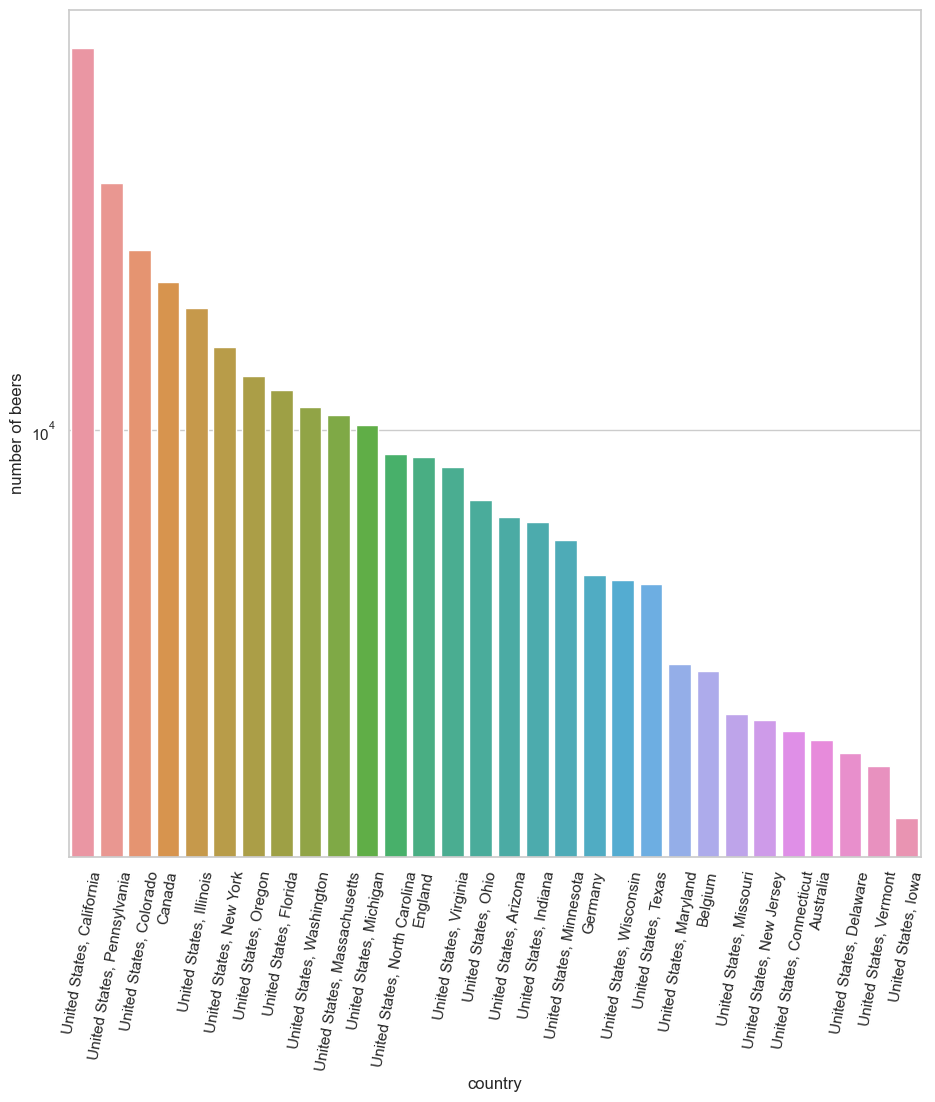

In [75]:
data_dict = {'country': nbr_beers_by_country.index, 'nbr_beer':nbr_beers_by_country.values}

plt.figure(figsize=(11,11))
ax = sns.barplot(x='country', y='nbr_beer', data=data_dict, log=True)
plt.xticks(rotation=80)
plt.xlabel('country')
plt.ylabel('number of beers')

We can observe that the top producing countries are mainly Western countries (USA, Western Europe, Canada, Australia)

The first non-Western country is Brazil (13th position)

Does it exist a correlation between:
- population of the country and nbr of beers? 
- wealth of the country and nbr of beers?

### Number of different beer styles produced per country (descending order)

To determine the number of different beer styles per country, we need for each beer its style which is provided in the beers dataset but we also need the country of production which is not provided. The information of the country can be retrieved from the breweries dataset given that each beer is associated with a brewery and each brewery with a country.

Let us the two datasets mentioned above.

In [76]:
beers_merged = pd.merge(beers, breweries, left_on='brewery_id', right_on='id')
beers_merged = beers_merged.drop(columns='id')
beers_merged.head(5)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location,name,nbr_beers
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5


Number of beers per country could be the one obtained by summing in breweries.csv or directly from beers.csv

In [77]:
df = beers_merged.groupby('location').size()
df

location
Albania                      15
Algeria                      12
Andorra                       9
Angola                        2
Antigua & Barbuda             2
                           ... 
Virgin Islands (British)      1
Virgin Islands (U.S.)        24
Wales                       486
Zambia                        3
Zimbabwe                     18
Length: 277, dtype: int64

In [78]:
df.sort_values(ascending=False)
#pas exactement pareil que le résultat précédent

location
United States, California      26822
Canada                         16370
United States, Pennsylvania    13036
United States, New York        11659
United States, Colorado        11335
                               ...  
Gabon                              1
Niger                              1
Tajikistan                         1
Equatorial Guinea                  1
Paraguay                           1
Length: 277, dtype: int64

In [79]:
df1 = beers_merged.groupby(['location','style']).size()
#df1['Albania']
df1

location  style                       
Albania   American Amber / Red Lager      1
          American Blonde Ale             1
          Czech Pilsener                  1
          Euro Dark Lager                 1
          Euro Pale Lager                 8
                                         ..
Zimbabwe  English India Pale Ale (IPA)    1
          English Pale Ale                1
          English Stout                   1
          Euro Pale Lager                 6
          Light Lager                     1
Length: 9977, dtype: int64

In [80]:
df2 = beers_merged.groupby(['location','style']).size().reset_index()
#df2[df2.location == 'Albania']
df2

,location,style,0
0,Albania,American Amber / Red Lager,1
1,Albania,American Blonde Ale,1
2,Albania,Czech Pilsener,1
3,Albania,Euro Dark Lager,1
4,Albania,Euro Pale Lager,8
...,...,...,...
9972,Zimbabwe,English India Pale Ale (IPA),1
9973,Zimbabwe,English Pale Ale,1
9974,Zimbabwe,English Stout,1
9975,Zimbabwe,Euro Pale Lager,6


In [81]:
#proportion of beer styles produced in Albania
style_prod_Alb = 100*df1['Albania']/df['Albania']
style_prod_Alb

style
American Amber / Red Lager     6.666667
American Blonde Ale            6.666667
Czech Pilsener                 6.666667
Euro Dark Lager                6.666667
Euro Pale Lager               53.333333
Hefeweizen                     6.666667
Maibock / Helles Bock          6.666667
Märzen / Oktoberfest           6.666667
dtype: float64

In [82]:
style_prod_Alb2 = 100*df2[df2.location == 'Albania'][0]/df['Albania']
style_prod_Alb2

0     6.666667
1     6.666667
2     6.666667
3     6.666667
4    53.333333
5     6.666667
6     6.666667
7     6.666667
Name: 0, dtype: float64

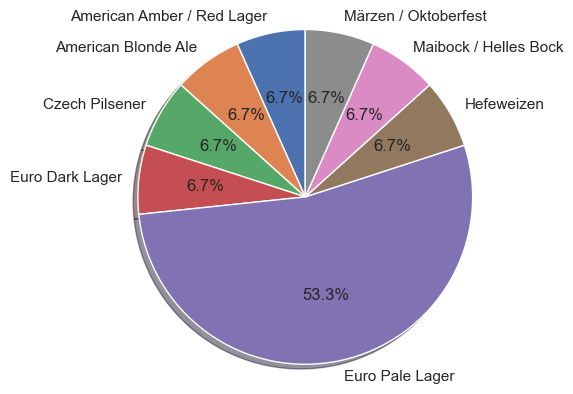

In [83]:
fig1, ax1 = plt.subplots()
ax1.pie(style_prod_Alb.values, labels=style_prod_Alb.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [84]:
#Where are users the most expert

In [85]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153704 entries, 0 to 153703
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   nbr_ratings  153704 non-null  int64  
 1   nbr_reviews  153704 non-null  int64  
 2   user_id      153704 non-null  object 
 3   user_name    153703 non-null  object 
 4   joined       151052 non-null  float64
 5   location     122425 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 7.0+ MB


In [86]:
users_country = users.groupby('location')
users_country.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
152255,2,1,cba.76658,CBA,1.146305e+09,British Indian Ocean Territory
153341,1,1,paxfolksen.1079444,PaxFolksen,1.449745e+09,Sint Maarten
153359,2,0,stephanos.745564,stephanos,1.375178e+09,Tanzania
153361,1,0,josephyego.1114248,JosephYego,1.456571e+09,Kenya


In [87]:
nbr_users_country = users_country.size().sort_values(ascending=False)[:30]
nbr_users_country

location
United States, California        11638
United States, Pennsylvania       8689
United States, New York           7432
United States, Illinois           6866
United States, Massachusetts      6658
United States, Texas              5893
United States, Ohio               4776
United States, Florida            4604
United States, Michigan           4213
United States, New Jersey         3716
United States, Virginia           3604
United States, North Carolina     3405
Canada                            3324
United States, Washington         2891
United States, Minnesota          2854
United States, Connecticut        2792
United States, Indiana            2644
United States, Georgia            2633
United States, Wisconsin          2375
United States, Maryland           2335
United States, Colorado           2326
United States, Missouri           1703
United States, Oregon             1629
United States, Arizona            1317
United States, South Carolina     1309
United States, T

Text(0, 0.5, 'number of users')

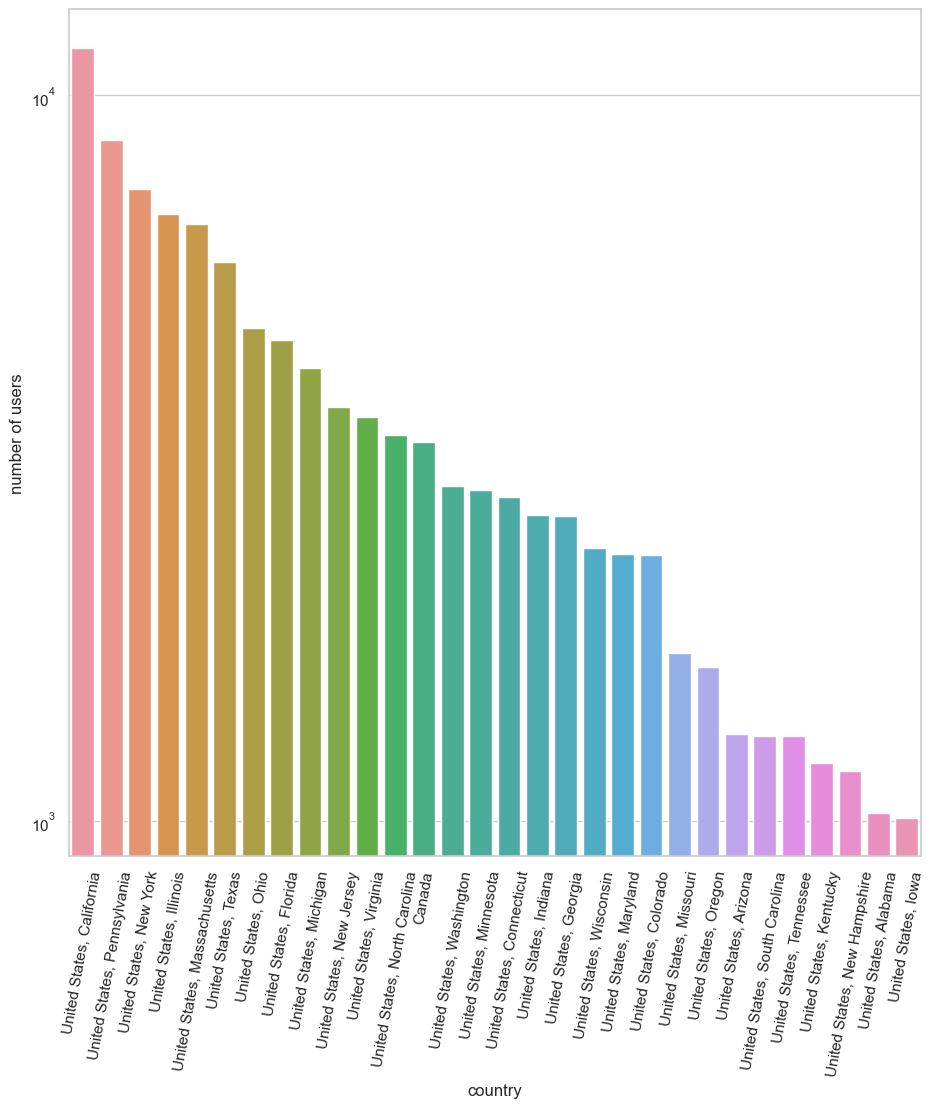

In [88]:
data_dict = {'country': nbr_users_country.index, 'nbr_users':nbr_users_country.values}

plt.figure(figsize=(11,11))
ax = sns.barplot(x='country', y='nbr_users', data=data_dict, log=True)
plt.xticks(rotation=80)
plt.xlabel('country')
plt.ylabel('number of users')

In [89]:
#total number of ratings/reviews per country
df4 = users_country.sum().sort_values(by = 'nbr_ratings', ascending=False)
df4

,nbr_ratings,nbr_reviews,joined
location,,,
"United States, California",658200,191166,1.567836e+13
"United States, Pennsylvania",654042,201864,1.156855e+13
"United States, Illinois",552906,136338,9.241737e+12
"United States, New York",492720,154911,1.000408e+13
"United States, Massachusetts",414197,132084,8.911678e+12
...,...,...,...
Senegal,1,0,1.451819e+09
Seychelles,1,0,1.374314e+09
Sint Maarten,1,1,1.449745e+09


In [90]:
#average number of ratings/reviews by user per country
df5 = users_country.mean().sort_values(by = 'nbr_ratings', ascending=False)
df5

,nbr_ratings,nbr_reviews,joined
location,,,
Jersey,1261.000000,374.000000,1.390734e+09
Lesotho,1153.000000,785.000000,1.203332e+09
Panama,274.115385,10.192308,1.386491e+09
Romania,267.031746,55.396825,1.410026e+09
Svalbard and Jan Mayen Islands,229.500000,57.000000,1.231931e+09
...,...,...,...
Mauritania,1.000000,1.000000,1.114942e+09
Nigeria,1.000000,1.000000,1.306490e+09
Senegal,1.000000,0.000000,1.451819e+09


In [91]:
df6 = users_country.median().sort_values(by = 'nbr_ratings', ascending=False)
df6

,nbr_ratings,nbr_reviews,joined
location,,,
Jersey,1261.0,374.0,1.390734e+09
Lesotho,1153.0,785.0,1.203332e+09
Svalbard and Jan Mayen Islands,229.5,57.0,1.231931e+09
Bolivia,223.0,28.5,1.337339e+09
Jordan,163.0,163.0,1.277374e+09
...,...,...,...
Kyrgyzstan,1.0,0.0,1.359630e+09
Gibraltar,1.0,1.0,1.275905e+09
Aruba,1.0,0.5,1.427150e+09


In [92]:
DATA_FOLDER2 = 'Dataset/matched_beer_data/'

RATINGS_DATASET = DATA_FOLDER2+"ratings.csv"

In [93]:
ratings = pd.read_csv(RATINGS_DATASET)
ratings.head()

/var/folders/xm/5j2wtkpd2fq69c8yqn8zhchr0000gn/T/ipykernel_2637/1449692808.py:1: DtypeWarning: Columns (0,1,2,3,5,7,8,9,10,11,13,17,18,19,20,22,24,25,26,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings = pd.read_csv(RATINGS_DATASET)


,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,...,rb.6,rb.7,rb.8,rb.9,rb.10,rb.11,rb.12,rb.13,rb.14,rb.15
0,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,...,brewery_name,date,overall,palate,rating,style,taste,text,user_id,user_name
1,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,...,Brasserie Rochefort,1387710000,19.0,4.0,4.6,Abt/Quadrupel,9.0,a) Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...,83106,Erzengel
2,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,1322650800,NaN,NaN,...,Myanmar Brewery and Distillery,1322564400,6.0,2.0,1.7,Pale Lager,4.0,"Can. Weak and watery, not the best beer of the...",91324,visionthing
3,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Cantillon,1353582000,17.0,4.0,4.1,Lambic Style - Fruit,8.0,"Bottle @ One Pint Pub, Helsinki. Originally ra...",98624,tiong
4,5.0,4.0,3.5,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Cantillon,1416222000,16.0,4.0,4.1,Lambic Style - Unblended,9.0,"Draught @Â Pikkulintu, Helsinki, Finland. A pr...",98624,tiong


In [94]:
columns_ba = ratings.columns[['ba' in column for column in ratings.columns]]
ratings_ba = ratings[columns_ba]
ratings_ba

,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,ba.10,ba.11,ba.12,ba.13,ba.14,ba.15,ba.16
0,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,rating,review,style,taste,text,user_id,user_name
1,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,4.8,True,Quadrupel (Quad),5.0,Best before 27.07.2016Directly reviewed in com...,erzengel.248045,Erzengel
2,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,1322650800,NaN,NaN,3.0,True,American Adjunct Lager,NaN,NaN,visionthing.639993,visionthing
3,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,3.85,True,Lambic - Fruit,4.0,"Bottle @ One Pint Pub, Helsinki. 2006 vintage....",tiong.608427,tiong
4,5.0,4.0,3.5,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,1344074400,4.0,4.0,3.68,True,Lambic - Unblended,3.5,"Originally rated on 16.11.2009, draught @ Pikk...",tiong.608427,tiong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21960,8.5,4.5,3.5,28030,Valeir Divers,3463,Brouwerij Contreras,1323946800,4.0,4.0,3.91,True,Tripel,4.0,Valeir Divers 33cl bottle from www.belgianbeer...,thebeerwatcher.630107,TheBeerWatcher
21961,8.0,4.25,4.25,5057,Fantôme Saison,738,Brasserie Fantôme,1484046000,4.0,4.0,4.08,True,Saison / Farmhouse Ale,4.0,NaN,jonj.982265,jonj
21962,5.2,NaN,NaN,349,Jupiler,134,Brasserie Piedboeuf,1393239600,NaN,NaN,3.0,True,Euro Pale Lager,NaN,NaN,maxilouis.784601,Maxilouis
21963,6.5,3.0,3.0,127162,Redenaar,32560,Brouwerij d'Oude Maalderij,1419764400,3.0,2.75,2.88,True,Belgian Pale Ale,2.75,NaN,simoen.728327,simoen


In [95]:
columns_rb = ratings.columns[['rb' in column for column in ratings.columns]]
ratings_rb = ratings[columns_rb]
ratings_rb

,rb,rb.1,rb.2,rb.3,rb.4,rb.5,rb.6,rb.7,rb.8,rb.9,rb.10,rb.11,rb.12,rb.13,rb.14,rb.15
0,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,rating,style,taste,text,user_id,user_name
1,11.3,4.0,10.0,2360,Rochefort Trappistes 10,406,Brasserie Rochefort,1387710000,19.0,4.0,4.6,Abt/Quadrupel,9.0,a) Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...,83106,Erzengel
2,5.0,2.0,3.0,17109,Myanmar Lager Beer,2921,Myanmar Brewery and Distillery,1322564400,6.0,2.0,1.7,Pale Lager,4.0,"Can. Weak and watery, not the best beer of the...",91324,visionthing
3,5.0,4.0,8.0,35298,Cantillon Tyrnilambic Baie dArgousier,1069,Cantillon,1353582000,17.0,4.0,4.1,Lambic Style - Fruit,8.0,"Bottle @ One Pint Pub, Helsinki. Originally ra...",98624,tiong
4,5.0,4.0,8.0,113596,Cantillon Pikkulinnun Viskilambic,1069,Cantillon,1416222000,16.0,4.0,4.1,Lambic Style - Unblended,9.0,"Draught @Â Pikkulintu, Helsinki, Finland. A pr...",98624,tiong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21960,8.5,4.0,7.0,56990,Contreras Valeir Divers,1954,Contreras,1323946800,15.0,4.0,3.7,Abbey Tripel,7.0,Valeir Divers 33cl bottle from www.belgianbeer...,137922,TheBeerWatcher
21961,8.0,4.0,8.0,7661,Fantôme Saison,1289,Brasserie Fantôme,1487502000,16.0,4.0,4.0,Saison,8.0,.................................................,394232,jonj
21962,5.2,5.0,3.0,8042,Jupiler,2004,Brasserie Piedboeuf (InBev),1393153200,1.0,1.0,1.2,Pale Lager,2.0,"Biere, foin, pain grillÃ©, terreux, banane, ca...",304802,maxilouis
21963,6.5,3.0,8.0,248989,dOude Maalderij Redenaar,15326,dOude Maalderij,1397037600,17.0,3.0,3.9,Belgian Ale,8.0,This is the first blond ale from this brewery....,276666,simoen


In [96]:
ratings_merged_ba = pd.merge(ratings_ba, users, left_on='ba.15', right_on='user_id')
ratings_merged_ba = ratings_merged_ba.drop(columns='ba.15')
ratings_merged_ba

,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,...,ba.12,ba.13,ba.14,ba.16,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,...,Quadrupel (Quad),5.0,Best before 27.07.2016Directly reviewed in com...,Erzengel,6,6,erzengel.248045,Erzengel,1.220868e+09,Germany
1,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,1322650800,NaN,NaN,...,American Adjunct Lager,NaN,NaN,visionthing,11,0,visionthing.639993,visionthing,1.322737e+09,Estonia
2,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Lambic - Fruit,4.0,"Bottle @ One Pint Pub, Helsinki. 2006 vintage....",tiong,8,8,tiong.608427,tiong,1.309946e+09,Finland
3,5.0,4.0,3.5,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Lambic - Unblended,3.5,"Originally rated on 16.11.2009, draught @ Pikk...",tiong,8,8,tiong.608427,tiong,1.309946e+09,Finland
4,6.0,4.0,4.0,81125,Drie Fonteinen Oude Geuze - Armand & Tommy,2216,Brouwerij 3 Fonteinen,1346234400,4.0,4.0,...,Gueuze,4.0,"750ml bottle, originally rated on 18.8.2012.Bo...",tiong,8,8,tiong.608427,tiong,1.309946e+09,Finland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21959,8.5,4.5,3.5,28030,Valeir Divers,3463,Brouwerij Contreras,1323946800,4.0,4.0,...,Tripel,4.0,Valeir Divers 33cl bottle from www.belgianbeer...,TheBeerWatcher,11,11,thebeerwatcher.630107,TheBeerWatcher,1.319105e+09,Belgium
21960,8.0,4.25,4.25,5057,Fantôme Saison,738,Brasserie Fantôme,1484046000,4.0,4.0,...,Saison / Farmhouse Ale,4.0,NaN,jonj,77,0,jonj.982265,jonj,1.430561e+09,Faroe Islands
21961,5.2,NaN,NaN,349,Jupiler,134,Brasserie Piedboeuf,1393239600,NaN,NaN,...,Euro Pale Lager,NaN,NaN,Maxilouis,29,0,maxilouis.784601,Maxilouis,1.393240e+09,Belgium
21962,6.5,3.0,3.0,127162,Redenaar,32560,Brouwerij d'Oude Maalderij,1419764400,3.0,2.75,...,Belgian Pale Ale,2.75,NaN,simoen,225,0,simoen.728327,simoen,1.365761e+09,Belgium


In [97]:
#Le merge fait perdre tellement de données..

In [98]:
ratings_merged_ba = pd.merge(ratings_merged_ba, beers, left_on='ba.3', right_on='beer_id')
ratings_merged_ba = ratings_merged_ba.drop(columns='ba.3')
ratings_merged_ba


,ba,ba.1,ba.2,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,ba.10,...,nbr_ratings_y,nbr_reviews_y,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,6.3,3.5,3.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1302343200,3.0,3.5,3.08,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
1,6.3,4.0,4.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1291201200,3.5,4.0,3.7,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
2,6.0,3.0,3.25,King Gose Home Imperial Gose,14879,Hoppin' Frog Brewery,1419937200,3.25,3.5,3.26,...,117,14,3.84,86.0,NaN,6.0,3.719231,-0.420429,15,3.796000
3,10.5,4.5,4.0,Sixteen,392,Weyerbacher Brewing Co.,1311415200,4.0,4.0,4.03,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615
4,10.5,3.5,4.5,Sixteen,392,Weyerbacher Brewing Co.,1309341600,4.0,4.0,3.89,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,7.0,4.75,5.0,Juice Pants,37139,Maplewood Brewery & Distillery,1461319200,5.0,5.0,4.99,...,43,10,4.09,88.0,NaN,7.0,4.120930,0.289134,12,4.199167
5577,5.5,NaN,NaN,Dark 'n Curvy,1151,Piece Brewery & Pizzeria,1397642400,NaN,NaN,4.25,...,73,22,3.92,86.0,NaN,5.5,3.998904,0.197924,22,3.907273
5578,6.5,4.0,3.5,Vlasbier,634,Brouwerij Van Eecke N.V.,1230548400,1.5,2.0,2.58,...,17,11,3.44,82.0,NaN,6.5,3.486471,-0.624192,11,3.327273
5579,8.5,4.5,3.5,Valeir Divers,3463,Brouwerij Contreras,1323946800,4.0,4.0,3.91,...,48,25,3.77,84.0,NaN,8.5,3.742500,-0.207188,25,3.823200


In [99]:
len(ratings_merged_ba)

5581

In [100]:
ratings_merged_ba.dropna(subset=['ba.8'], inplace=True)

In [101]:
len(ratings_merged_ba)


4639

In [102]:
#ratings_merged_ba.dtypes
ratings_merged_ba['ba.8'] = ratings_merged_ba['ba.8'].astype(float)

In [103]:
ratings_merged_ba_country = ratings_merged_ba.groupby('location')
ratings_merged_ba.head()

,ba,ba.1,ba.2,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,ba.10,...,nbr_ratings_y,nbr_reviews_y,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,6.3,3.5,3.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1302343200,3.00,3.5,3.08,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
1,6.3,4.0,4.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1291201200,3.50,4.0,3.7,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
2,6.0,3.0,3.25,King Gose Home Imperial Gose,14879,Hoppin' Frog Brewery,1419937200,3.25,3.5,3.26,...,117,14,3.84,86.0,NaN,6.0,3.719231,-0.420429,15,3.796000
3,10.5,4.5,4.0,Sixteen,392,Weyerbacher Brewing Co.,1311415200,4.00,4.0,4.03,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615
4,10.5,3.5,4.5,Sixteen,392,Weyerbacher Brewing Co.,1309341600,4.00,4.0,3.89,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615


In [104]:
ratings_merged_ba_country_style = ratings_merged_ba.groupby(['location','style'])
ratings_merged_ba_country_style.head()

,ba,ba.1,ba.2,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,ba.10,...,nbr_ratings_y,nbr_reviews_y,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,6.3,3.5,3.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1302343200,3.00,3.5,3.08,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
1,6.3,4.0,4.0,Tallgrass IPA,16333,Tallgrass Brewing Company,1291201200,3.50,4.0,3.7,...,366,174,3.61,82.0,92.0,6.3,3.628087,-0.381078,175,3.602571
2,6.0,3.0,3.25,King Gose Home Imperial Gose,14879,Hoppin' Frog Brewery,1419937200,3.25,3.5,3.26,...,117,14,3.84,86.0,NaN,6.0,3.719231,-0.420429,15,3.796000
3,10.5,4.5,4.0,Sixteen,392,Weyerbacher Brewing Co.,1311415200,4.00,4.0,4.03,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615
4,10.5,3.5,4.5,Sixteen,392,Weyerbacher Brewing Co.,1309341600,4.00,4.0,3.89,...,326,168,3.83,86.0,90.0,10.5,3.855337,-0.034175,169,3.814615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,5.3,3.0,3.0,5 Rabbit,25544,5 Rabbit Cerveceria,1393153200,3.00,2.75,2.98,...,181,29,3.37,78.0,NaN,5.3,3.298066,-1.029862,30,3.351000
5575,5.5,4.5,4.5,Alabama Hot Tub,34315,Hailstorm Brewing Co.,1430388000,4.25,4.25,4.33,...,15,2,4.01,85.0,NaN,5.5,3.886000,-0.161097,2,4.005000
5578,6.5,4.0,3.5,Vlasbier,634,Brouwerij Van Eecke N.V.,1230548400,1.50,2.0,2.58,...,17,11,3.44,82.0,NaN,6.5,3.486471,-0.624192,11,3.327273
5579,8.5,4.5,3.5,Valeir Divers,3463,Brouwerij Contreras,1323946800,4.00,4.0,3.91,...,48,25,3.77,84.0,NaN,8.5,3.742500,-0.207188,25,3.823200


In [105]:
ratings_merged_ba_country_style.size()

location                  style                  
Australia                 American IPA               1
                          American Pale Ale (APA)    1
                          Belgian Strong Dark Ale    1
                          English Bitter             1
                          Märzen / Oktoberfest       2
                                                    ..
United States, Wisconsin  Saison / Farmhouse Ale     2
                          Schwarzbier                1
                          Scotch Ale / Wee Heavy     1
                          Tripel                     1
                          Weizenbock                 1
Length: 1587, dtype: int64

In [106]:
ratings_merged_ba_country_style.mean()['ba.8']

location                  style                  
Australia                 American IPA               3.500
                          American Pale Ale (APA)    3.500
                          Belgian Strong Dark Ale    4.000
                          English Bitter             3.500
                          Märzen / Oktoberfest       3.500
                                                     ...  
United States, Wisconsin  Saison / Farmhouse Ale     3.875
                          Schwarzbier                3.000
                          Scotch Ale / Wee Heavy     4.500
                          Tripel                     4.500
                          Weizenbock                 3.500
Name: ba.8, Length: 1587, dtype: float64

In [107]:
len(ratings_merged_ba[~ratings_merged_ba['ba.8'].isna()]['ba.8'].astype(int))

4639

In [108]:
#ratings_merged_ba[(ratings_merged_ba.location == 'Australia') & (ratings_merged_ba['style'] == 'American IPA')]

In [109]:
df_agg = ratings_merged_ba.groupby(['location','style']).agg('mean')['ba.8']
df_agg

location                  style                  
Australia                 American IPA               3.500
                          American Pale Ale (APA)    3.500
                          Belgian Strong Dark Ale    4.000
                          English Bitter             3.500
                          Märzen / Oktoberfest       3.500
                                                     ...  
United States, Wisconsin  Saison / Farmhouse Ale     3.875
                          Schwarzbier                3.000
                          Scotch Ale / Wee Heavy     4.500
                          Tripel                     4.500
                          Weizenbock                 3.500
Name: ba.8, Length: 1587, dtype: float64

In [110]:
df_agg = ratings_merged_ba.groupby(['location','style'])


In [111]:
dict_country_style = {}

for key, group in df_agg:
    if key[0] not in dict_country_style:
        dict_country_style[key[0]] = {}
    dict_country_style[key[0]][key[1]] = (np.mean(group['ba.8']), len(group['ba.8']))
    #create dataframe
    # name of dataframe = country.

for country in dict_country_style:
    dict_country_style[country] = dict(sorted(dict_country_style[country].items(), key=lambda item: item[1], reverse=True))



In [112]:
dict_country_style['United States, Wisconsin']

{'Rauchbier': (5.0, 1),
 'Faro': (4.75, 1),
 'Lambic - Fruit': (4.75, 1),
 'American Wild Ale': (4.625, 2),
 'American Dark Wheat Ale': (4.5, 1),
 'California Common / Steam Beer': (4.5, 1),
 'Russian Imperial Stout': (4.5, 1),
 'Scotch Ale / Wee Heavy': (4.5, 1),
 'Tripel': (4.5, 1),
 'American IPA': (4.3125, 12),
 'American Barleywine': (4.25, 5),
 'American Black Ale': (4.25, 1),
 'Gose': (4.25, 1),
 'Oatmeal Stout': (4.25, 1),
 'American Double / Imperial Stout': (4.181818181818182, 11),
 'Belgian Strong Dark Ale': (4.0, 3),
 'American Porter': (4.0, 2),
 'Quadrupel (Quad)': (4.0, 2),
 'Belgian IPA': (4.0, 1),
 'Belgian Pale Ale': (4.0, 1),
 'Belgian Strong Pale Ale': (4.0, 1),
 'Kölsch': (4.0, 1),
 'Lambic - Unblended': (4.0, 1),
 'Saison / Farmhouse Ale': (3.875, 2),
 'American Double / Imperial IPA': (3.8333333333333335, 6),
 'American Pale Ale (APA)': (3.7916666666666665, 6),
 'Irish Red Ale': (3.75, 1),
 'Fruit / Vegetable Beer': (3.5833333333333335, 3),
 'American Brown Ale':

In [113]:
data_United_States_Wisconsin = pd.DataFrame.from_dict(dict_country_style['United States, Wisconsin'], orient = 'index')
data_United_States_Wisconsin.columns = ['avg_rating','nbr_rating']
data_United_States_Wisconsin

,avg_rating,nbr_rating
Rauchbier,5.000000,1
Faro,4.750000,1
Lambic - Fruit,4.750000,1
American Wild Ale,4.625000,2
American Dark Wheat Ale,4.500000,1
California Common / Steam Beer,4.500000,1
Russian Imperial Stout,4.500000,1
Scotch Ale / Wee Heavy,4.500000,1
Tripel,4.500000,1
American IPA,4.312500,12


In [114]:
dict_country_style['Spain']

{'Doppelbock': (5.0, 1),
 'Quadrupel (Quad)': (4.5, 1),
 'English Bitter': (4.25, 2),
 'American Black Ale': (4.25, 1),
 'Belgian Strong Pale Ale': (4.25, 1),
 'American IPA': (4.0, 2),
 'American Brown Ale': (4.0, 1),
 'American Pale Ale (APA)': (4.0, 1),
 'Dubbel': (4.0, 1),
 'American Adjunct Lager': (2.6666666666666665, 3),
 'Fruit / Vegetable Beer': (2.0, 1)}

In [115]:
data_Spain = pd.DataFrame.from_dict(dict_country_style['Spain'], orient = 'index')
data_Spain.columns = ['avg_rating','nbr_rating']
data_Spain['ranked_user'] = np.arange(1,len(data_Spain)+1)
data_Spain.index.name ='style'
data_Spain

,avg_rating,nbr_rating,ranked_user
style,,,
Doppelbock,5.000000,1,1
Quadrupel (Quad),4.500000,1,2
English Bitter,4.250000,2,3
American Black Ale,4.250000,1,4
Belgian Strong Pale Ale,4.250000,1,5
American IPA,4.000000,2,6
American Brown Ale,4.000000,1,7
American Pale Ale (APA),4.000000,1,8
Dubbel,4.000000,1,9


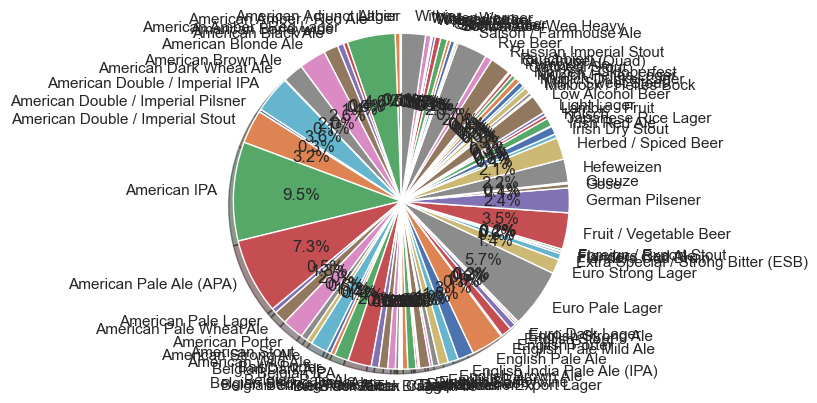

In [116]:
style_prod_Spain = 100*df1['Spain']/df['Spain']

fig1, ax1 = plt.subplots()
ax1.pie(style_prod_Spain.values, labels=style_prod_Spain.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [117]:
data_Spain2 = pd.DataFrame.from_dict(style_prod_Spain.sort_values(ascending=False))
data_Spain2.columns = ['production_%']
data_Spain2['ranked_prod'] = np.arange(1,len(data_Spain2)+1)
data_Spain2

,production_%,ranked_prod
style,,
American IPA,9.517515,1
American Pale Ale (APA),7.270324,2
Euro Pale Lager,5.684071,3
American Amber / Red Ale,4.626570,4
American Double / Imperial IPA,3.569068,5
...,...,...
Maibock / Helles Bock,0.132188,84
American Dark Wheat Ale,0.066094,85
Flanders Red Ale,0.066094,86


In [118]:
data_Spain_total = pd.merge(data_Spain, data_Spain2, left_index=True, right_index=True)
data_Spain_total

,avg_rating,nbr_rating,ranked_user,production_%,ranked_prod
style,,,,,
Doppelbock,5.000000,1,1,0.198282,73
Quadrupel (Quad),4.500000,1,2,0.330469,59
English Bitter,4.250000,2,3,0.925314,29
American Black Ale,4.250000,1,4,1.387971,24
Belgian Strong Pale Ale,4.250000,1,5,0.859220,30
American IPA,4.000000,2,6,9.517515,1
American Brown Ale,4.000000,1,7,1.982816,18
American Pale Ale (APA),4.000000,1,8,7.270324,2
Dubbel,4.000000,1,9,0.991408,26


In [119]:
#are users from Albania rating more (and prefering) beers from Albania?
#group by region of the worlds (à partir de nos résultats, essayer de voir si des pays similaires appartiennent à la meme region du monde (m^me culture, pays riches, pays occidentaux etc.))

In [120]:
df_agg = ratings_merged_ba.groupby(['location','style'])

In [121]:
dict_country_style = {}

for key, group in df_agg:
    if key[0] not in dict_country_style:
        dict_country_style[key[0]] = {}
    dict_country_style[key[0]][key[1]] = (np.mean(group['ba.8']), len(group['ba.8']))

for country in dict_country_style:
    dict_country_style[country] = dict(sorted(dict_country_style[country].items(), key=lambda item: item[1], reverse=True))

In [122]:
dict_country = {}

for country in ratings_merged_ba.location.unique():

    data_country1 = pd.DataFrame.from_dict(dict_country_style[country], orient = 'index')
    data_country1.columns = ['avg_rating','nbr_rating']
    data_country1['ranked_user'] = np.arange(1,len(data_country1)+1)
    data_country1.index.name ='style'

    dist_country = 100*df1[country]/df[country]
    data_country2 = pd.DataFrame.from_dict(dist_country.sort_values(ascending=False))
    data_country2.columns = ['production_%']
    data_country2['ranked_prod'] = np.arange(1,len(data_country2)+1)

    data_country = pd.merge(data_country1, data_country2, left_index=True, right_index=True)
    data_country['%_of_tot_nb_rating'] = 100*data_country['nbr_rating']/len(data_country['nbr_rating'])

    data_country['ranked_nbr_ratings'] = np.argsort(data_country['nbr_rating'])[::-1] + 1

    print(np.argsort(data_country['nbr_rating']))
    print(np.argsort(data_country['nbr_rating'])[::-1])

    data_country = data_country[['ranked_user', 'ranked_prod', 'ranked_nbr_ratings', 'avg_rating', 'nbr_rating', '%_of_tot_nb_rating', 'production_%']]

    dict_country[country] = data_country 

style
American Amber / Red Lager     0
Doppelbock                    21
Quadrupel (Quad)              22
Belgian Pale Ale              23
Saison / Farmhouse Ale        24
                              ..
Winter Warmer                  2
Herbed / Spiced Beer          35
Maibock / Helles Bock         37
Fruit / Vegetable Beer        26
Scotch Ale / Wee Heavy        27
Name: nbr_rating, Length: 65, dtype: int64
style
Scotch Ale / Wee Heavy        27
Fruit / Vegetable Beer        26
Maibock / Helles Bock         37
Herbed / Spiced Beer          35
Winter Warmer                  2
                              ..
Saison / Farmhouse Ale        24
Belgian Pale Ale              23
Quadrupel (Quad)              22
Doppelbock                    21
American Amber / Red Lager     0
Name: nbr_rating, Length: 65, dtype: int64
style
Milk / Sweet Stout                     32
Quadrupel (Quad)                        1
Kölsch                                  3
American Double / Imperial Stout        4
Am

Pour chaque pays, on a l'information:
- des styles les plus aimés (ranked_user)
- des styles les plus produits par les breweries du pays (ranked_prod)
- des styles les plus ratés par les users de ce pays (ranked_nbr_ratings)

In [123]:
dict_country['Spain']

,ranked_user,ranked_prod,ranked_nbr_ratings,avg_rating,nbr_rating,%_of_tot_nb_rating,production_%
style,,,,,,,
Doppelbock,1,73,1,5.000000,1,9.090909,0.198282
Quadrupel (Quad),2,59,2,4.500000,1,9.090909,0.330469
English Bitter,3,29,4,4.250000,2,18.181818,0.925314
American Black Ale,4,24,5,4.250000,1,9.090909,1.387971
Belgian Strong Pale Ale,5,30,7,4.250000,1,9.090909,0.859220
American IPA,6,1,8,4.000000,2,18.181818,9.517515
American Brown Ale,7,18,9,4.000000,1,9.090909,1.982816
American Pale Ale (APA),8,2,11,4.000000,1,9.090909,7.270324
Dubbel,9,26,3,4.000000,1,9.090909,0.991408


In [124]:
dict_country['Australia']

,ranked_user,ranked_prod,ranked_nbr_ratings,avg_rating,nbr_rating,%_of_tot_nb_rating,production_%
style,,,,,,,
Quadrupel (Quad),1,80,1,4.5,1,12.5,0.252101
Belgian Strong Dark Ale,2,49,2,4.0,1,12.5,0.504202
Schwarzbier,3,59,3,4.0,1,12.5,0.420168
Märzen / Oktoberfest,4,38,5,3.5,2,25.0,0.756303
American IPA,5,2,6,3.5,1,12.5,6.246499
American Pale Ale (APA),6,1,7,3.5,1,12.5,8.907563
English Bitter,7,16,8,3.5,1,12.5,1.876751
Scotch Ale / Wee Heavy,8,48,4,3.5,1,12.5,0.504202


In [125]:
dict_country.keys()

dict_keys(['United States, Ohio', 'United States, Texas', 'United States, Pennsylvania', 'United States, Florida', 'United States, Indiana', 'United States, California', 'Sweden', 'United States, Michigan', 'United States, Oregon', 'United States, North Carolina', 'United States, Colorado', 'United States, New Jersey', 'Canada', 'United States, Iowa', 'United States, Illinois', 'United States, Kentucky', 'United States, Georgia', 'United States, Tennessee', 'Faroe Islands', 'United States, New Hampshire', 'United States, Wisconsin', 'United States, Maryland', 'United States, Massachusetts', 'United States, Arizona', 'United States, Nebraska', 'United States, Virginia', 'United States, New York', 'United States, Oklahoma', 'United States, Rhode Island', 'United States, Washington', 'United States, Kansas', 'United States, South Carolina', 'Brazil', 'United States, Missouri', 'United States, Vermont', 'United States, Minnesota', 'United States, Utah', 'United States, South Dakota', 'Pola

In [126]:
# seulement 67 pays
len(dict_country.keys())

67

array([[<AxesSubplot:title={'center':'nbr_ratings'}>]], dtype=object)

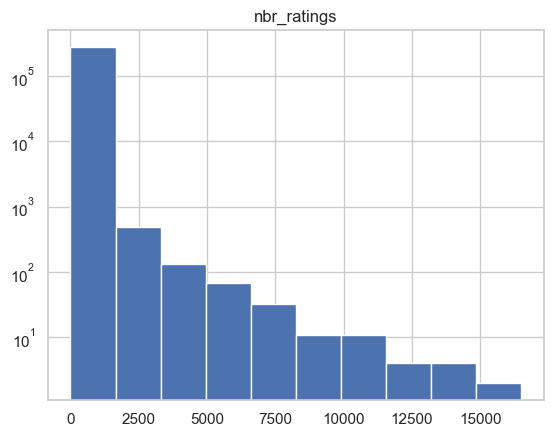

In [127]:
beers.hist(column= 'nbr_ratings', log=True)

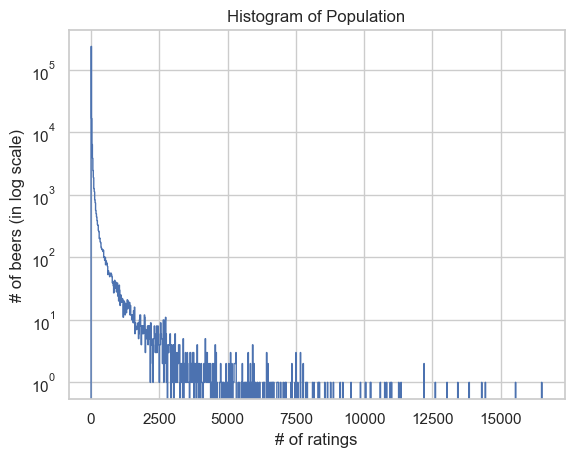

In [128]:
array_1000 = plt.hist(beers.nbr_ratings,bins=1000,log=True,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('# of beers (in log scale)')
plt.xlabel('# of ratings')
plt.show()

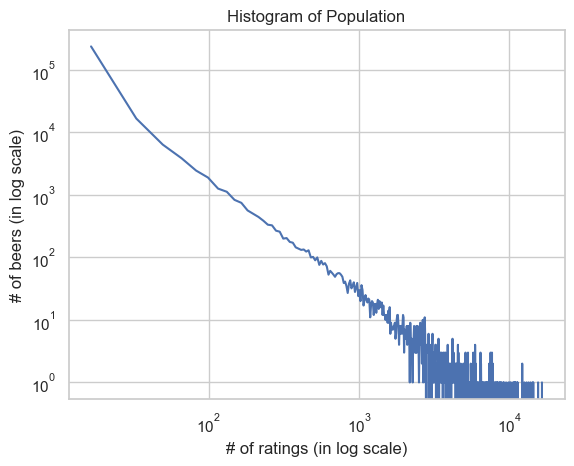

In [129]:
plt.loglog(array_1000[1][1:],array_1000[0])
plt.title('Histogram of Population')
plt.ylabel('# of beers (in log scale)')
plt.xlabel('# of ratings (in log scale)')
plt.show()

This is a straight line on log-log axes: power law

In [130]:
T = 10

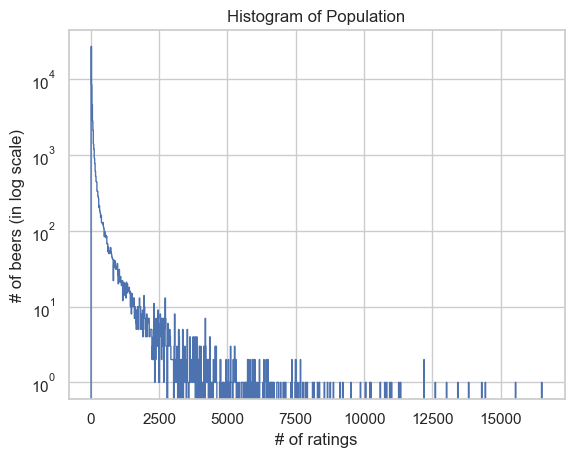

In [131]:
array_1000_T = plt.hist(beers[beers.nbr_ratings > T]['nbr_ratings'],bins=1000,log=True,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('# of beers (in log scale)')
plt.xlabel('# of ratings')
plt.show()

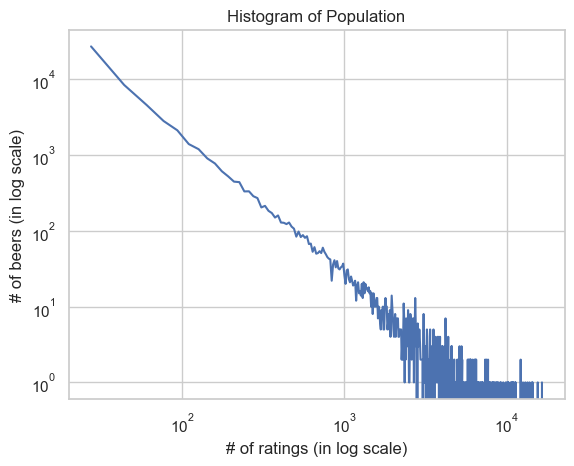

In [132]:
plt.loglog(array_1000_T[1][1:],array_1000_T[0])
plt.title('Histogram of Population')
plt.ylabel('# of beers (in log scale)')
plt.xlabel('# of ratings (in log scale)')
plt.show()

In [133]:
%reset -s -f